Detailed data description of Credit Risk dataset:
- Feature Name Description
- person_age Age
- person_income Annual Income
- personhomeownership Home ownership
- personemplength Employment length (in years)
- loan_intent Loan intent
- loan_grade Loan grade
- loan_amnt Loan amount
- loanintrate Interest rate
- loan_status Loan status (0 is non default 1 is default)
- loanpercentincome Percent income
- cbpersondefaultonfile Historical default
- cbpresoncredhistlength Credit history length

In [2]:
import pandas as pd 
df = pd.read_csv('../data/processed/credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28632 entries, 0 to 28631
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   person_age                  28632 non-null  int64   
 1   person_income               28632 non-null  int64   
 2   person_home_ownership       28632 non-null  category
 3   person_emp_length           28632 non-null  float64 
 4   loan_intent                 28632 non-null  category
 5   loan_grade                  28632 non-null  category
 6   loan_amnt                   28632 non-null  int64   
 7   loan_int_rate               28632 non-null  float64 
 8   loan_status                 28632 non-null  category
 9   loan_percent_income         28632 non-null  float64 
 10  cb_person_default_on_file   28632 non-null  category
 11  cb_person_cred_hist_length  28632 non-null  int64   
dtypes: category(5), float64(3), int64(4)
memory usage: 1.7 MB


In [18]:
print(type(df['cb_person_default_on_file'].dtype))

<class 'numpy.dtypes.ObjectDType'>


In [21]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = df[i].astype('category')


In [4]:
df['loan_status'] = df['loan_status'].replace({0:'non_defualt', 1:'defualt'})

In [5]:
print(df.isnull().sum())
print('duplicated value: ', df.duplicated().sum())

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64
duplicated value:  137


In [10]:
df = df.drop_duplicates()

In [24]:
df_clean = df.dropna()
df_clean

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,non_defualt,0.10,N,2
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,defualt,0.57,N,3
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,defualt,0.53,N,2
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,defualt,0.55,Y,4
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,defualt,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
28627,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,non_defualt,0.11,N,30
28628,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,non_defualt,0.15,N,19
28629,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,defualt,0.46,N,28
28630,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,non_defualt,0.10,N,26


In [23]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,28632.000000,2.863200e+04,28632.000000,28632.000000,28632.000000,28632.000000,28632.000000
mean,27.712140,6.642651e+04,4.780316,9655.331447,11.039701,0.169489,5.793553
std,6.171989,5.154746e+04,4.035616,6327.798706,3.229409,0.106361,4.037133
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.945600e+04,2.000000,5000.000000,7.900000,0.090000,3.000000
50%,26.000000,5.590000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.230000,8.000000
max,84.000000,2.039784e+06,41.000000,35000.000000,23.220000,0.830000,30.000000


In [26]:
df_clean.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,28495.000000,2.849500e+04,28495.000000,28495.000000,28495.000000,28495.000000,28495.000000
mean,27.723530,6.643047e+04,4.781751,9657.366205,11.045220,0.169517,5.800316
std,6.177199,5.151374e+04,4.037958,6327.711290,3.230786,0.106379,4.040800
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.230000,8.000000
max,84.000000,2.039784e+06,41.000000,35000.000000,23.220000,0.830000,30.000000


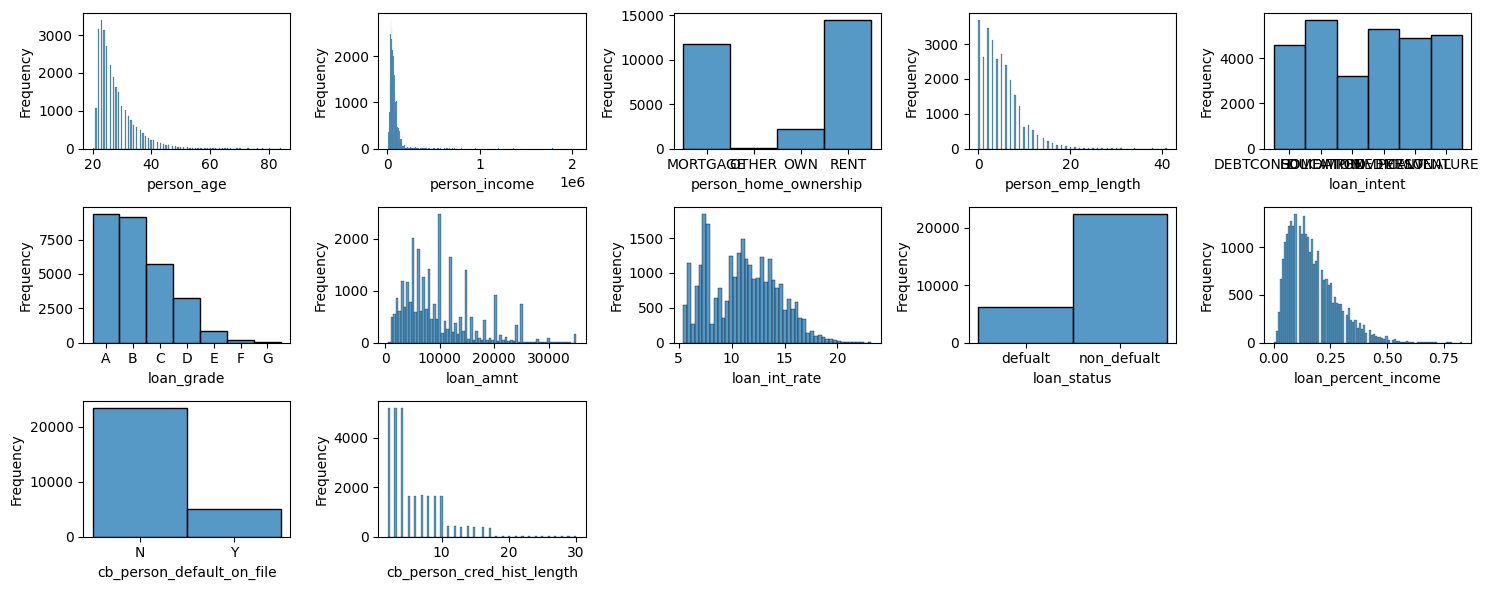

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(len(df_clean.columns)//4, 5, figsize=(15, 6))
axes = axes.flatten()
for i, col in enumerate(df_clean.columns):
    sns.histplot(df_clean[col], ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

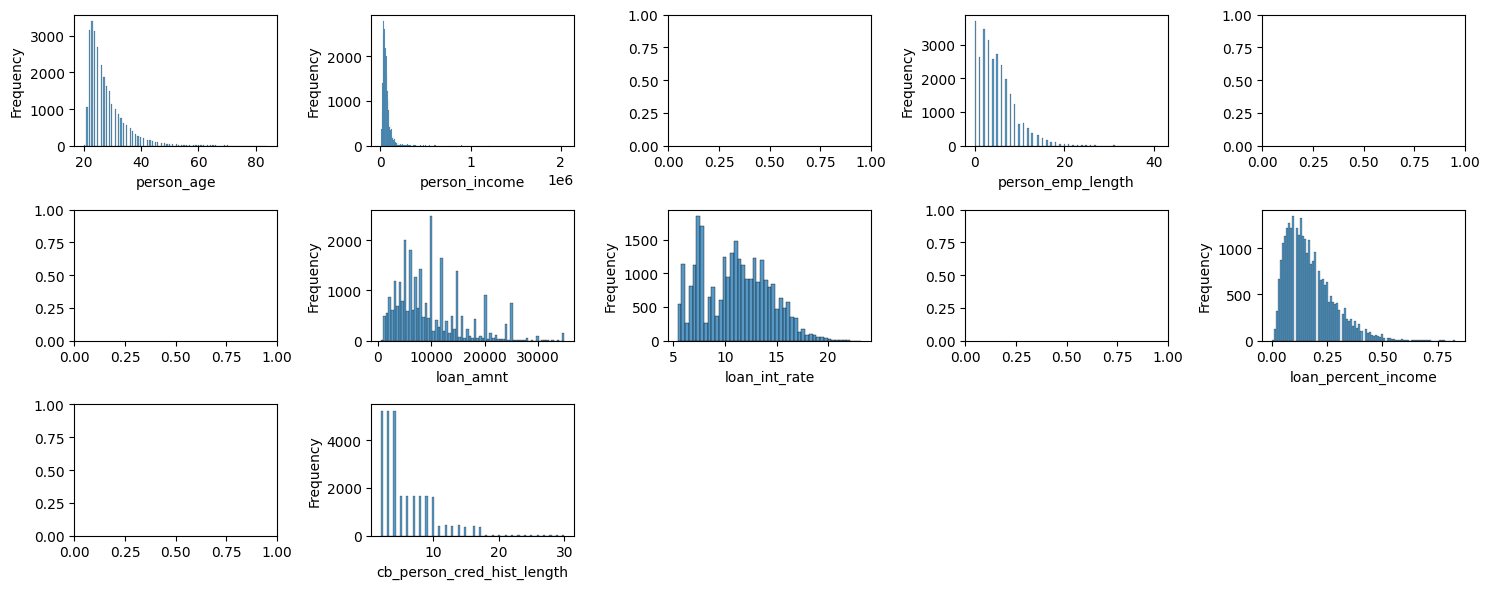

In [29]:
fig, axes = plt.subplots(len(df.columns)//4, 5, figsize=(15, 6))
axes = axes.flatten()
for i, col in enumerate(df.columns):
    if df[col].dtype != 'category':
        sns.histplot(df[col], ax=axes[i])
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frequency")
    
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

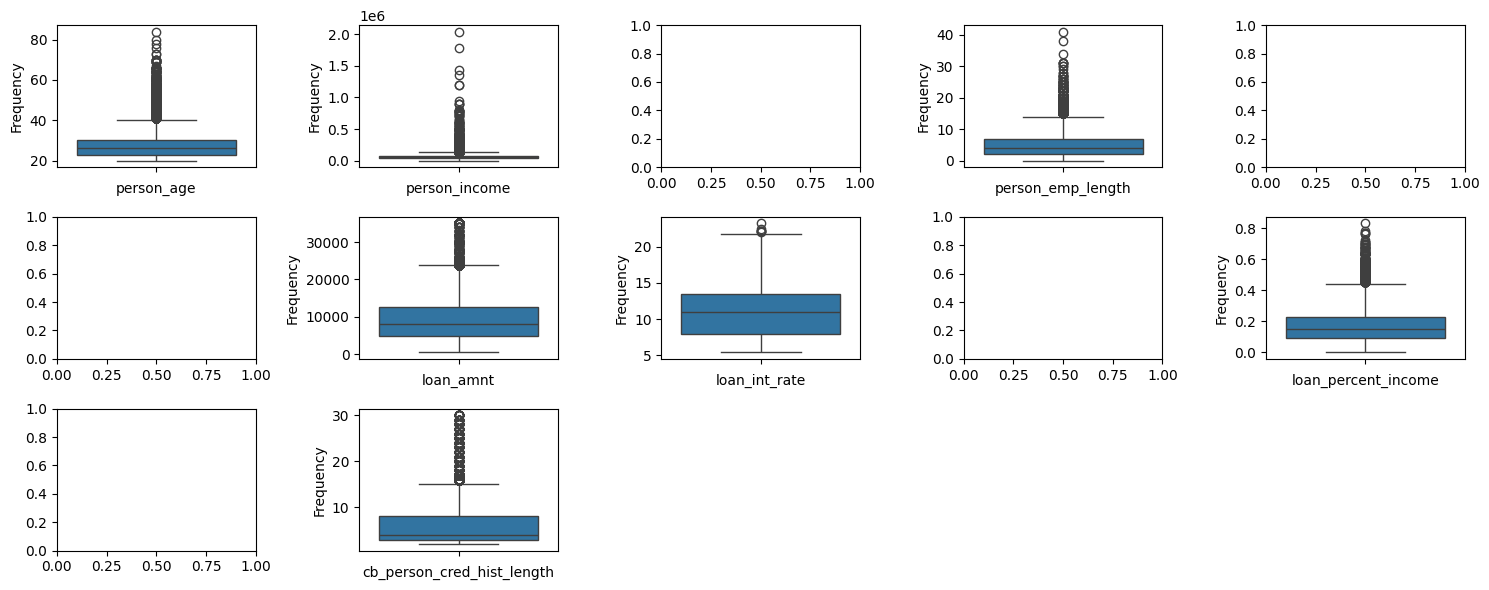

In [30]:
fig, axes = plt.subplots(len(df_clean.columns)//4, 5, figsize=(15, 6))
axes = axes.flatten()
for i, col in enumerate(df_clean.columns):
    if df[col].dtype != 'category':
        sns.boxplot(df_clean[col], ax=axes[i])
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frequency")
    
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

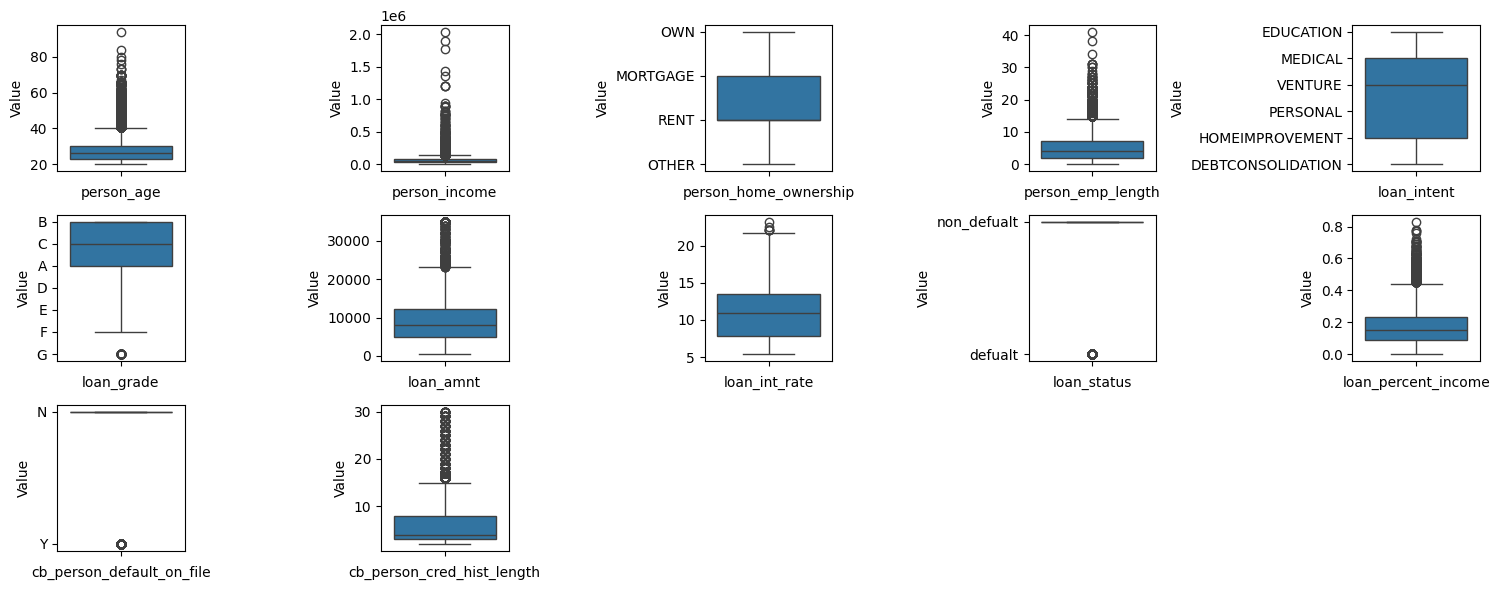

In [30]:
fig, axes = plt.subplots(len(df.columns)//4, 5, figsize=(15, 6))
axes = axes.flatten()
for i, col in enumerate(df.columns):
    sns.boxplot(df[col], ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Value")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [17]:
df.loc[df['person_age'] > 100]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,non_defualt,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,non_defualt,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,non_defualt,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,non_defualt,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,non_defualt,0.00,N,25


In [21]:
df.loc[df['person_emp_length'] > 50]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


In [22]:
df.loc[df['person_age'] < df['person_emp_length']]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


In [20]:
df = df.drop(df[(df['person_age'] > 100) | (df['person_emp_length'] > 50)].index)

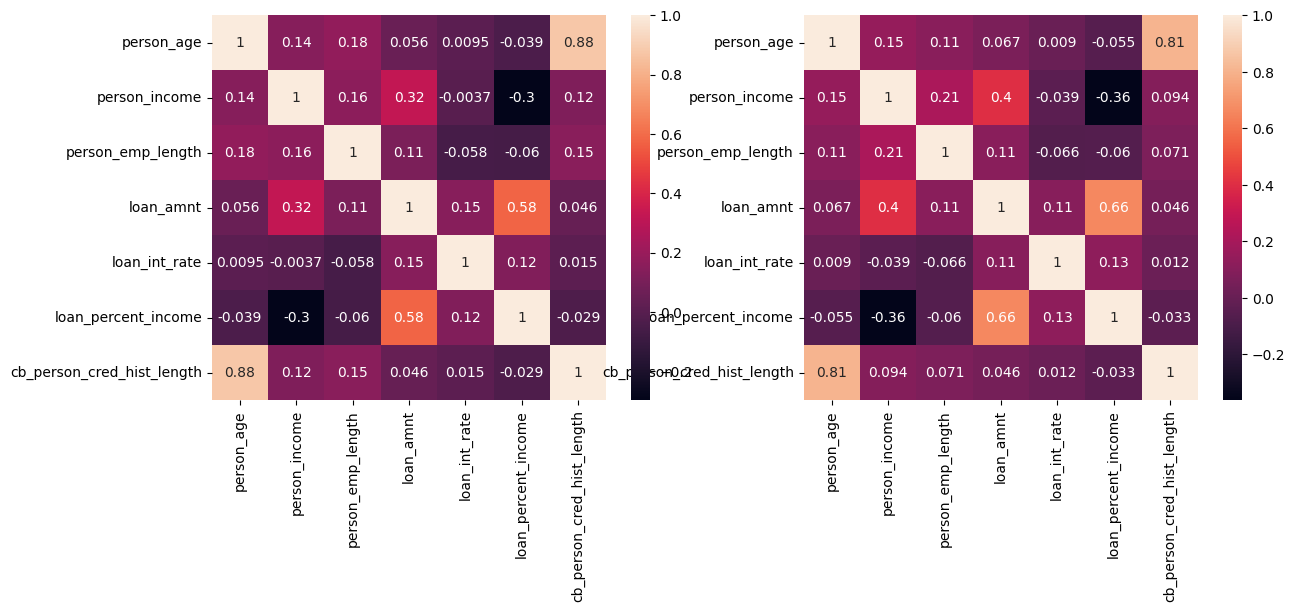

In [47]:
corr_spearman = df_clean.select_dtypes(include='number').corr('spearman')
corr_pearson = df_clean.select_dtypes(include='number').corr('pearson')

fig, axes = plt.subplots(1, 2, figsize=(14,5))

sns.heatmap(corr_pearson, annot=True, fmt='.2g', ax=axes[0])
sns.heatmap(corr_spearman, annot=True, fmt='.2g', ax=axes[1])
plt.show()


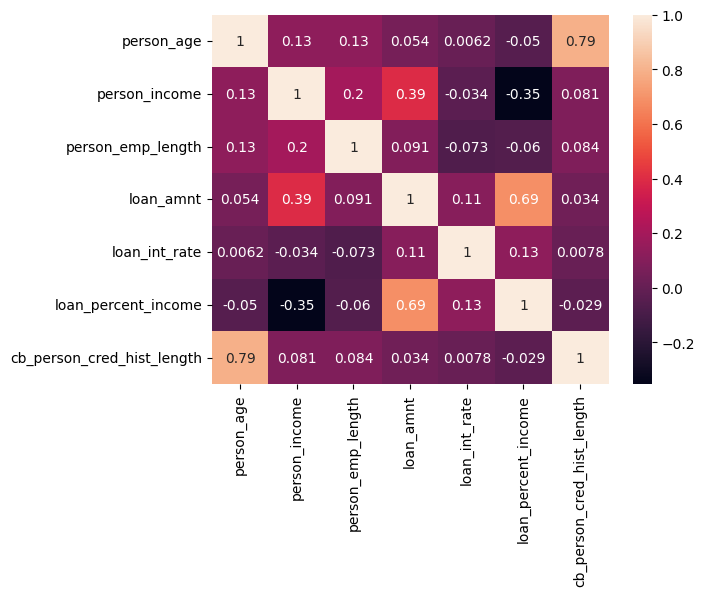

In [43]:
corr_log = df_log_clean.select_dtypes(include='number').corr(method='spearman')
sns.heatmap(corr_log, annot=True, fmt='.2g')
plt.show()

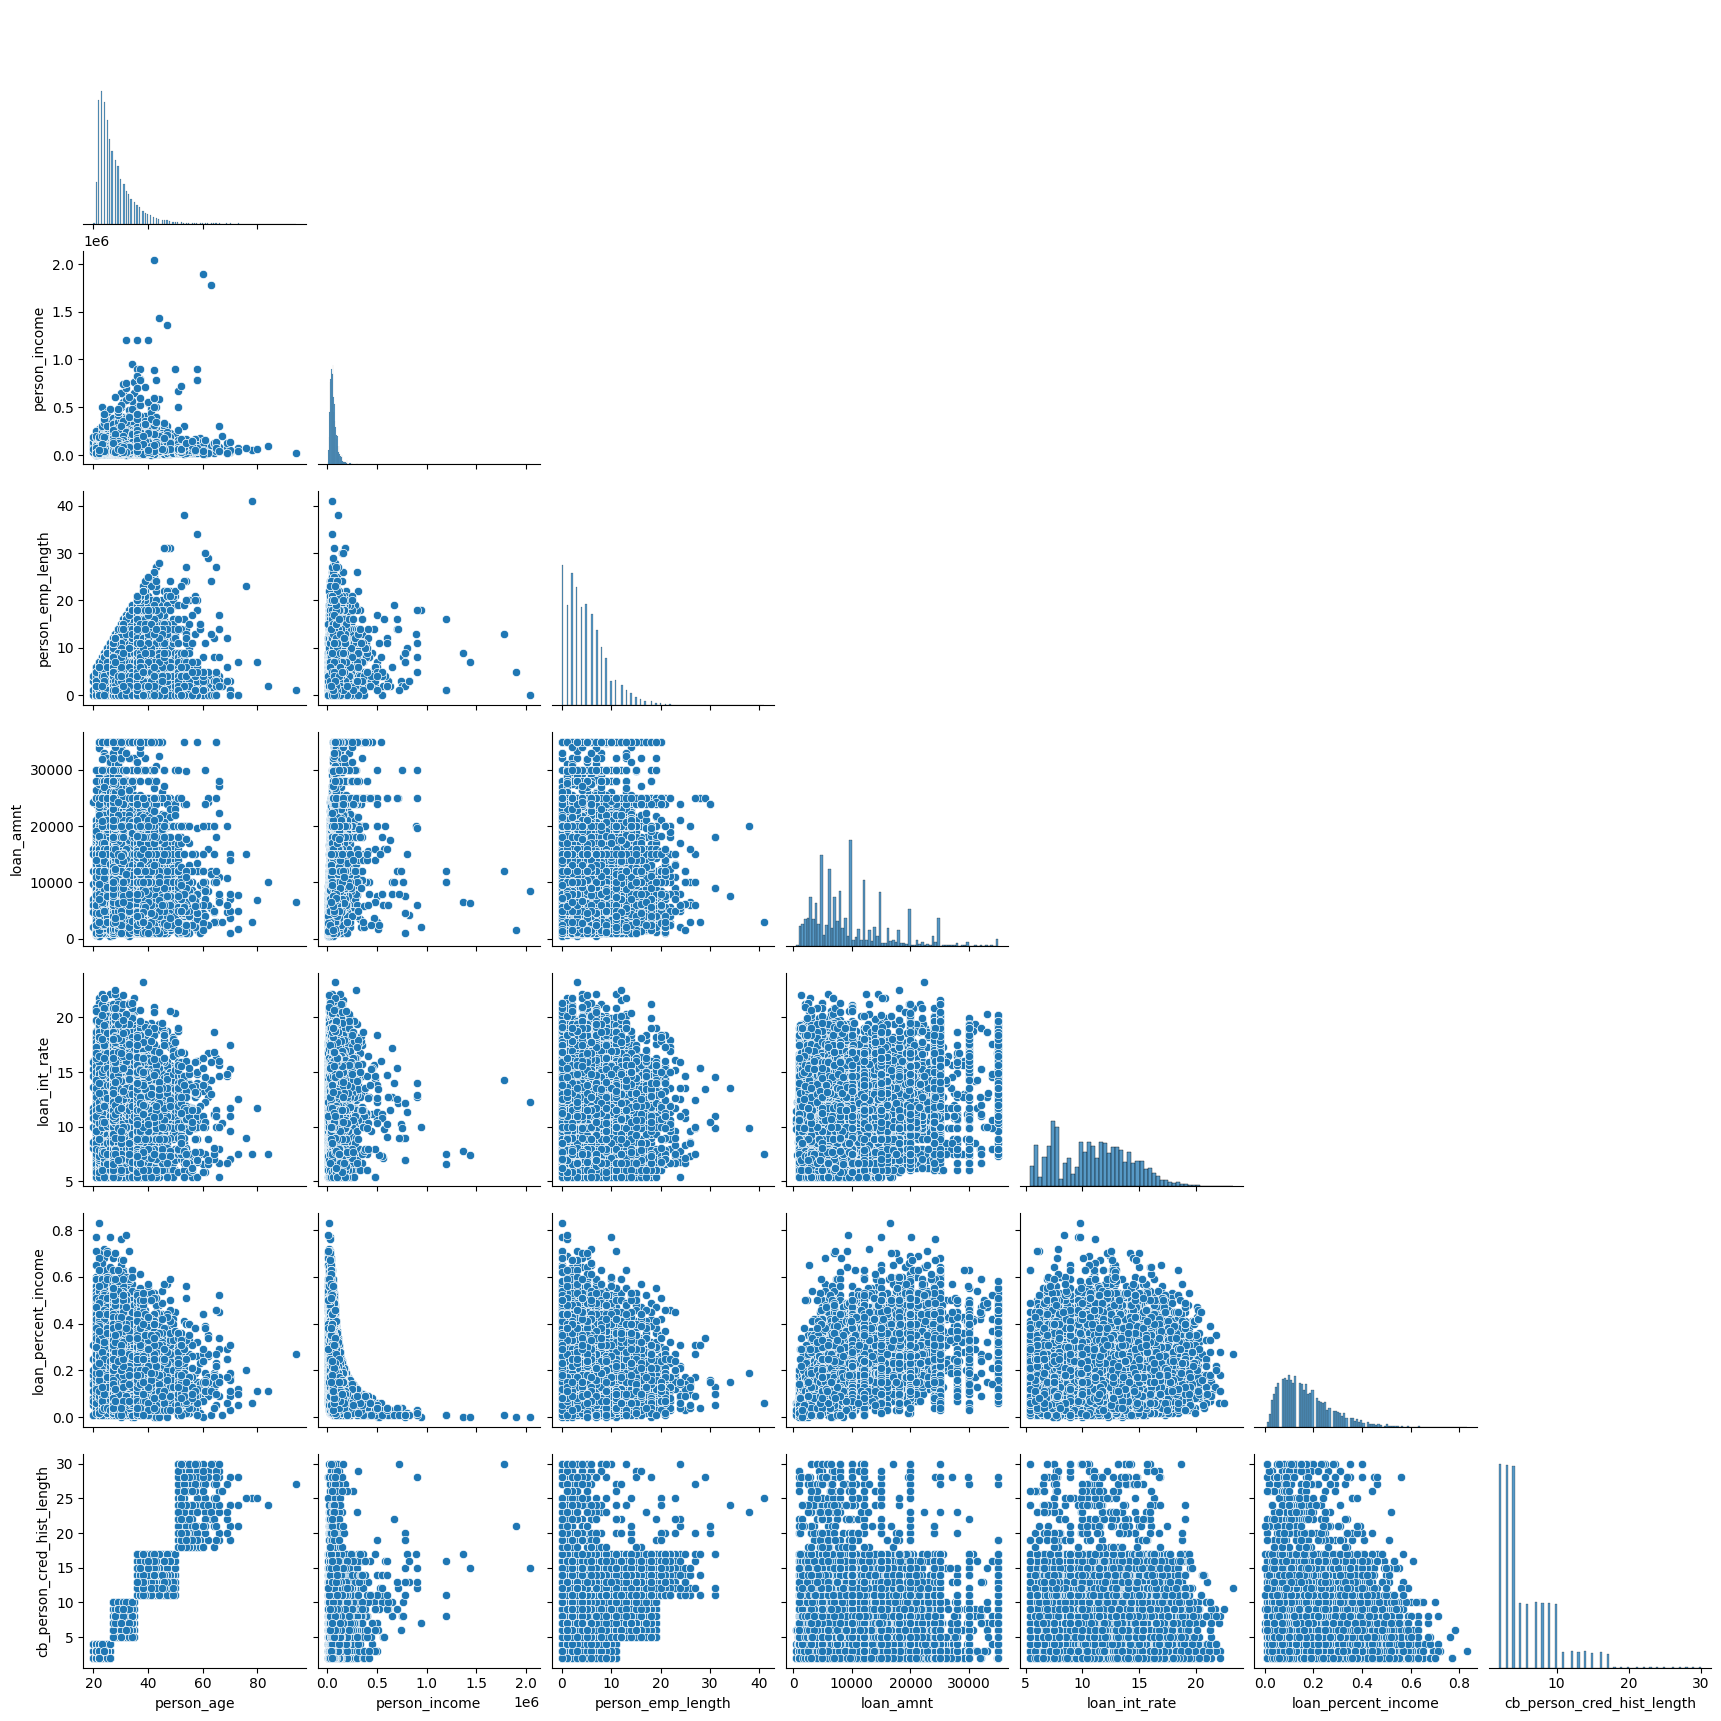

In [ ]:
sns.pairplot(df, corner=True, )
plt.show()

In [33]:
df_num = df_clean.select_dtypes(include='number')

In [38]:
df_num.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,28495.000000,2.849500e+04,28495.000000,28495.000000,28495.000000,28495.000000,28495.000000
mean,27.723530,6.643047e+04,4.781751,9657.366205,11.045220,0.169517,5.800316
std,6.177199,5.151374e+04,4.037958,6327.711290,3.230786,0.106379,4.040800
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.230000,8.000000
max,84.000000,2.039784e+06,41.000000,35000.000000,23.220000,0.830000,30.000000


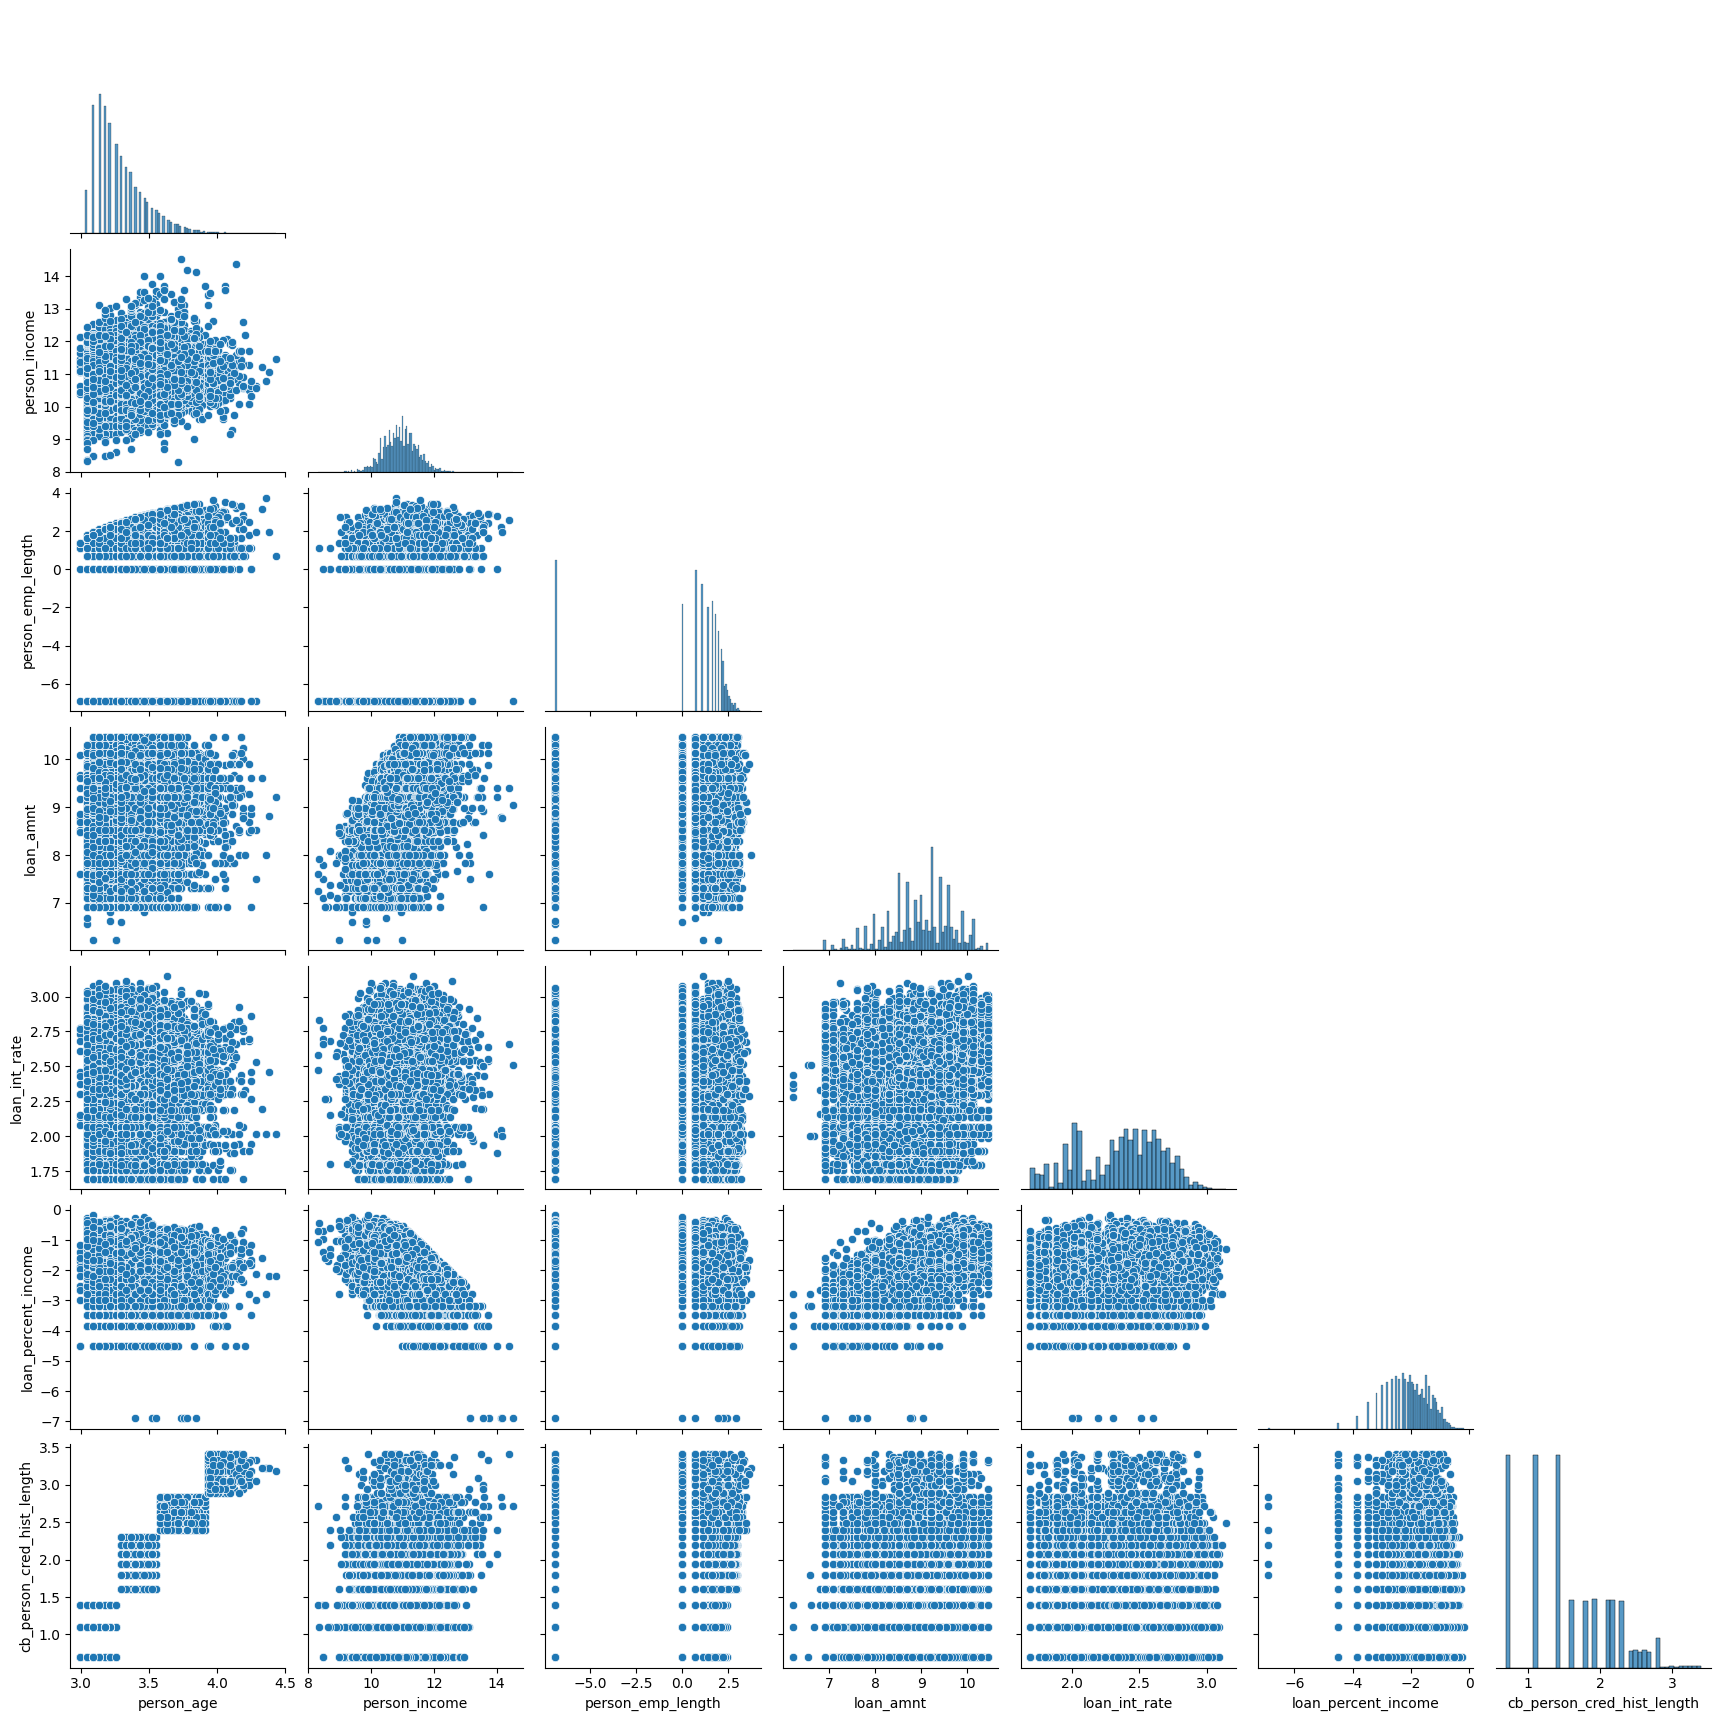

In [40]:
import numpy as np 
df_log = df_num.apply(lambda x: np.log(x+0.001))
sns.pairplot(df_log, corner=True)
plt.show()

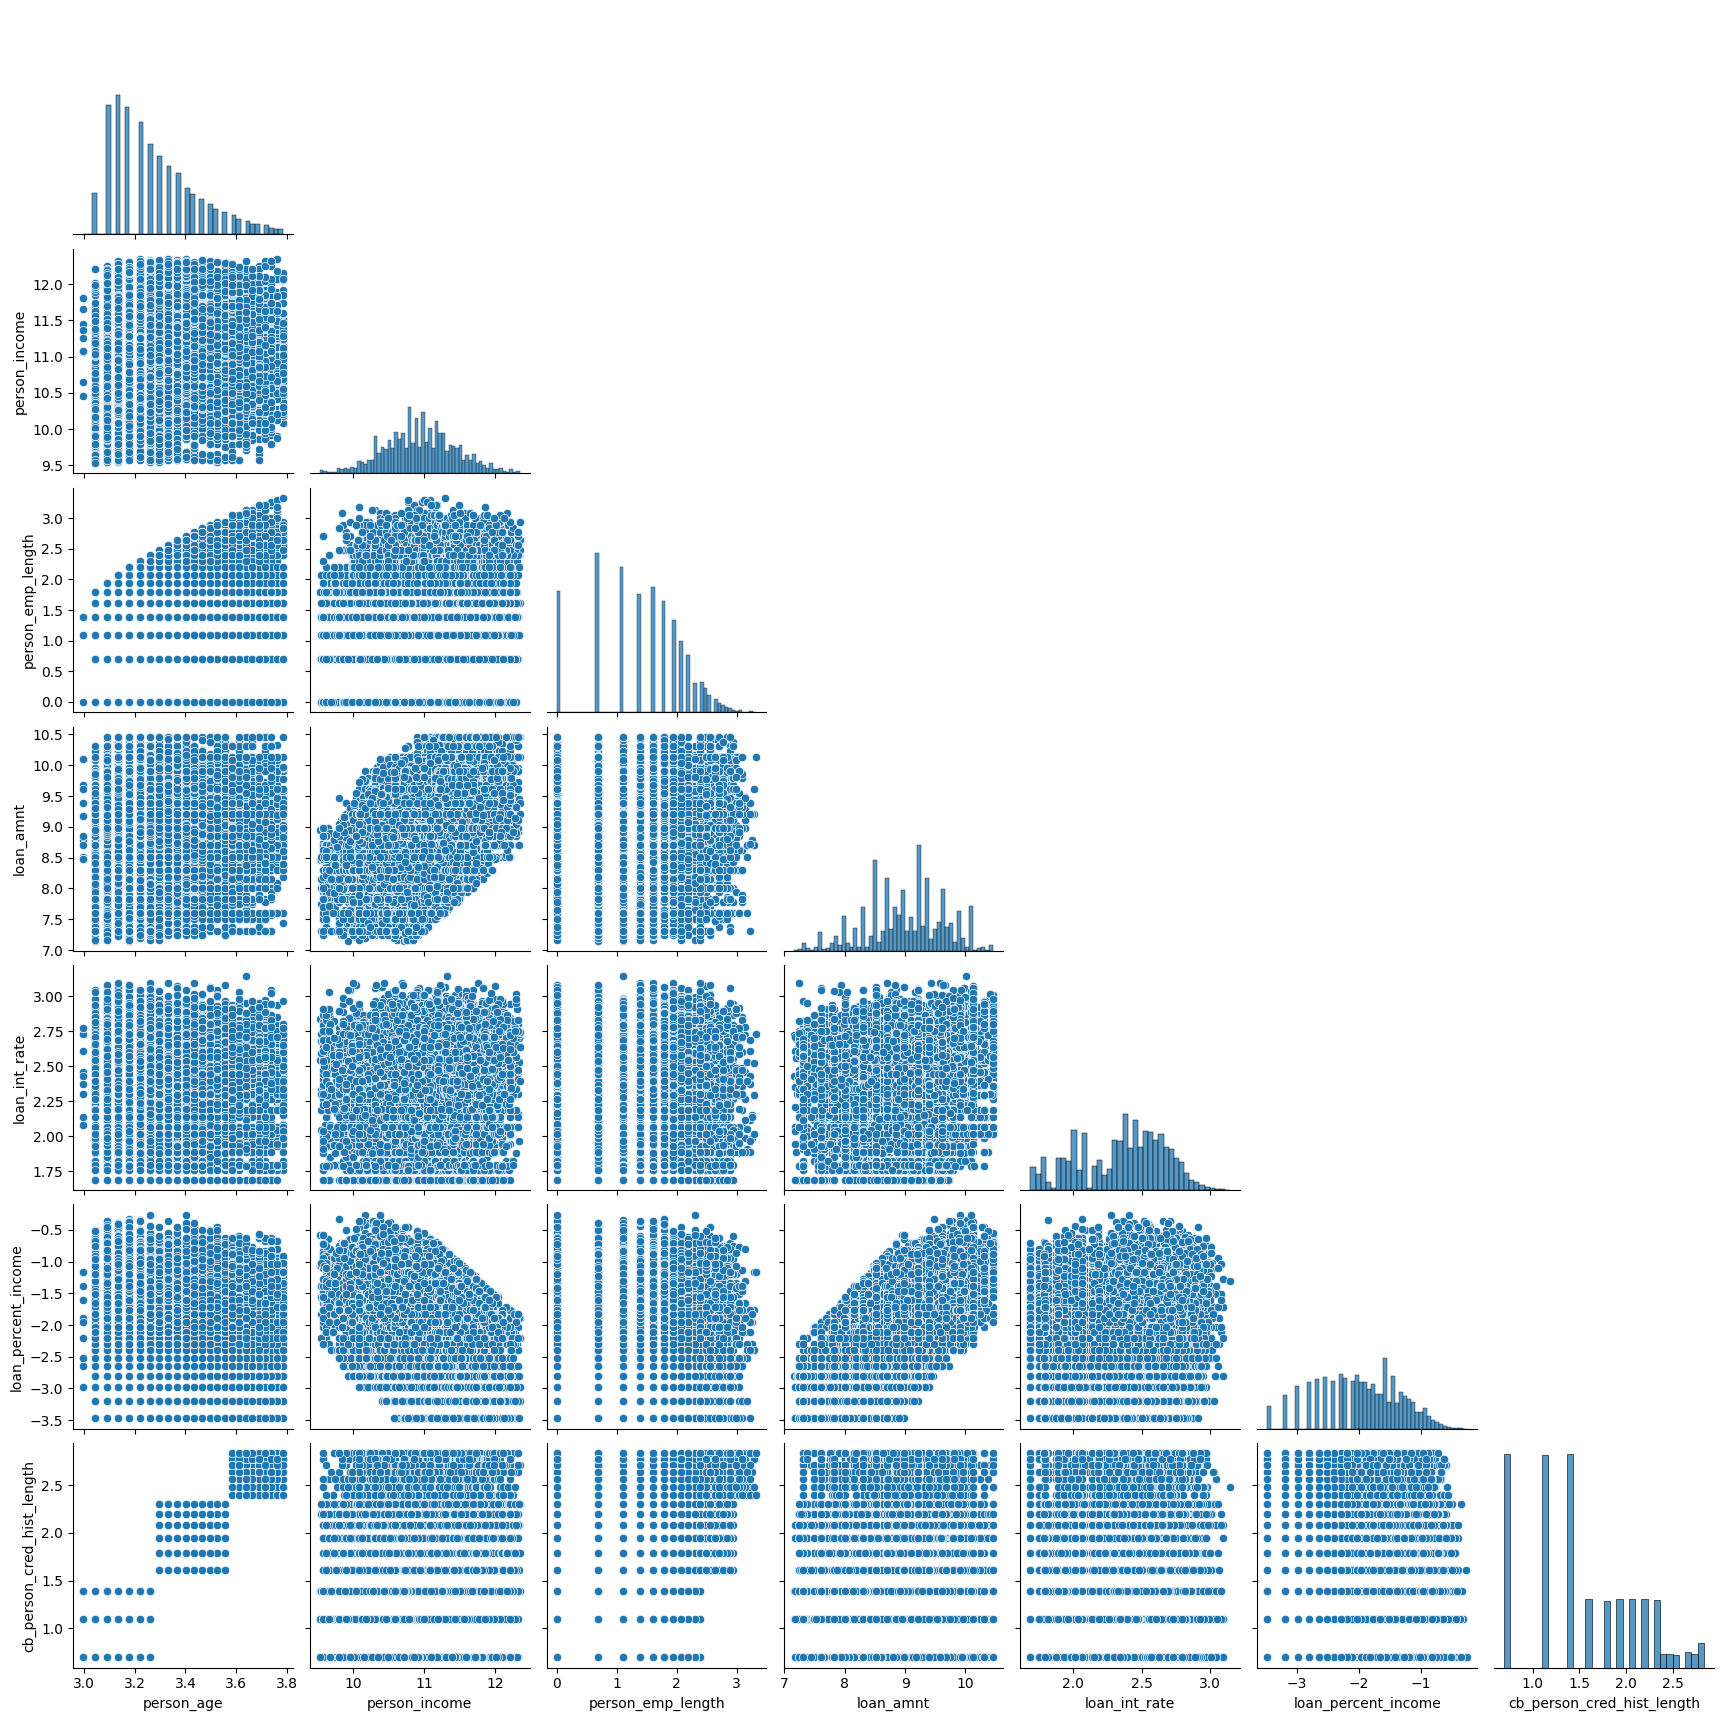

In [41]:
Q1 = df_log.quantile(0.25)
Q3 = df_log.quantile(0.75)
IQR = Q3 - Q1

df_log_clean = df_log[~(
    (df_log < (Q1 - 1.5 * IQR)) |
    (df_log > (Q3 + 1.5 * IQR))
).any(axis=1)]

sns.pairplot(df_log_clean, corner=True)
plt.show()

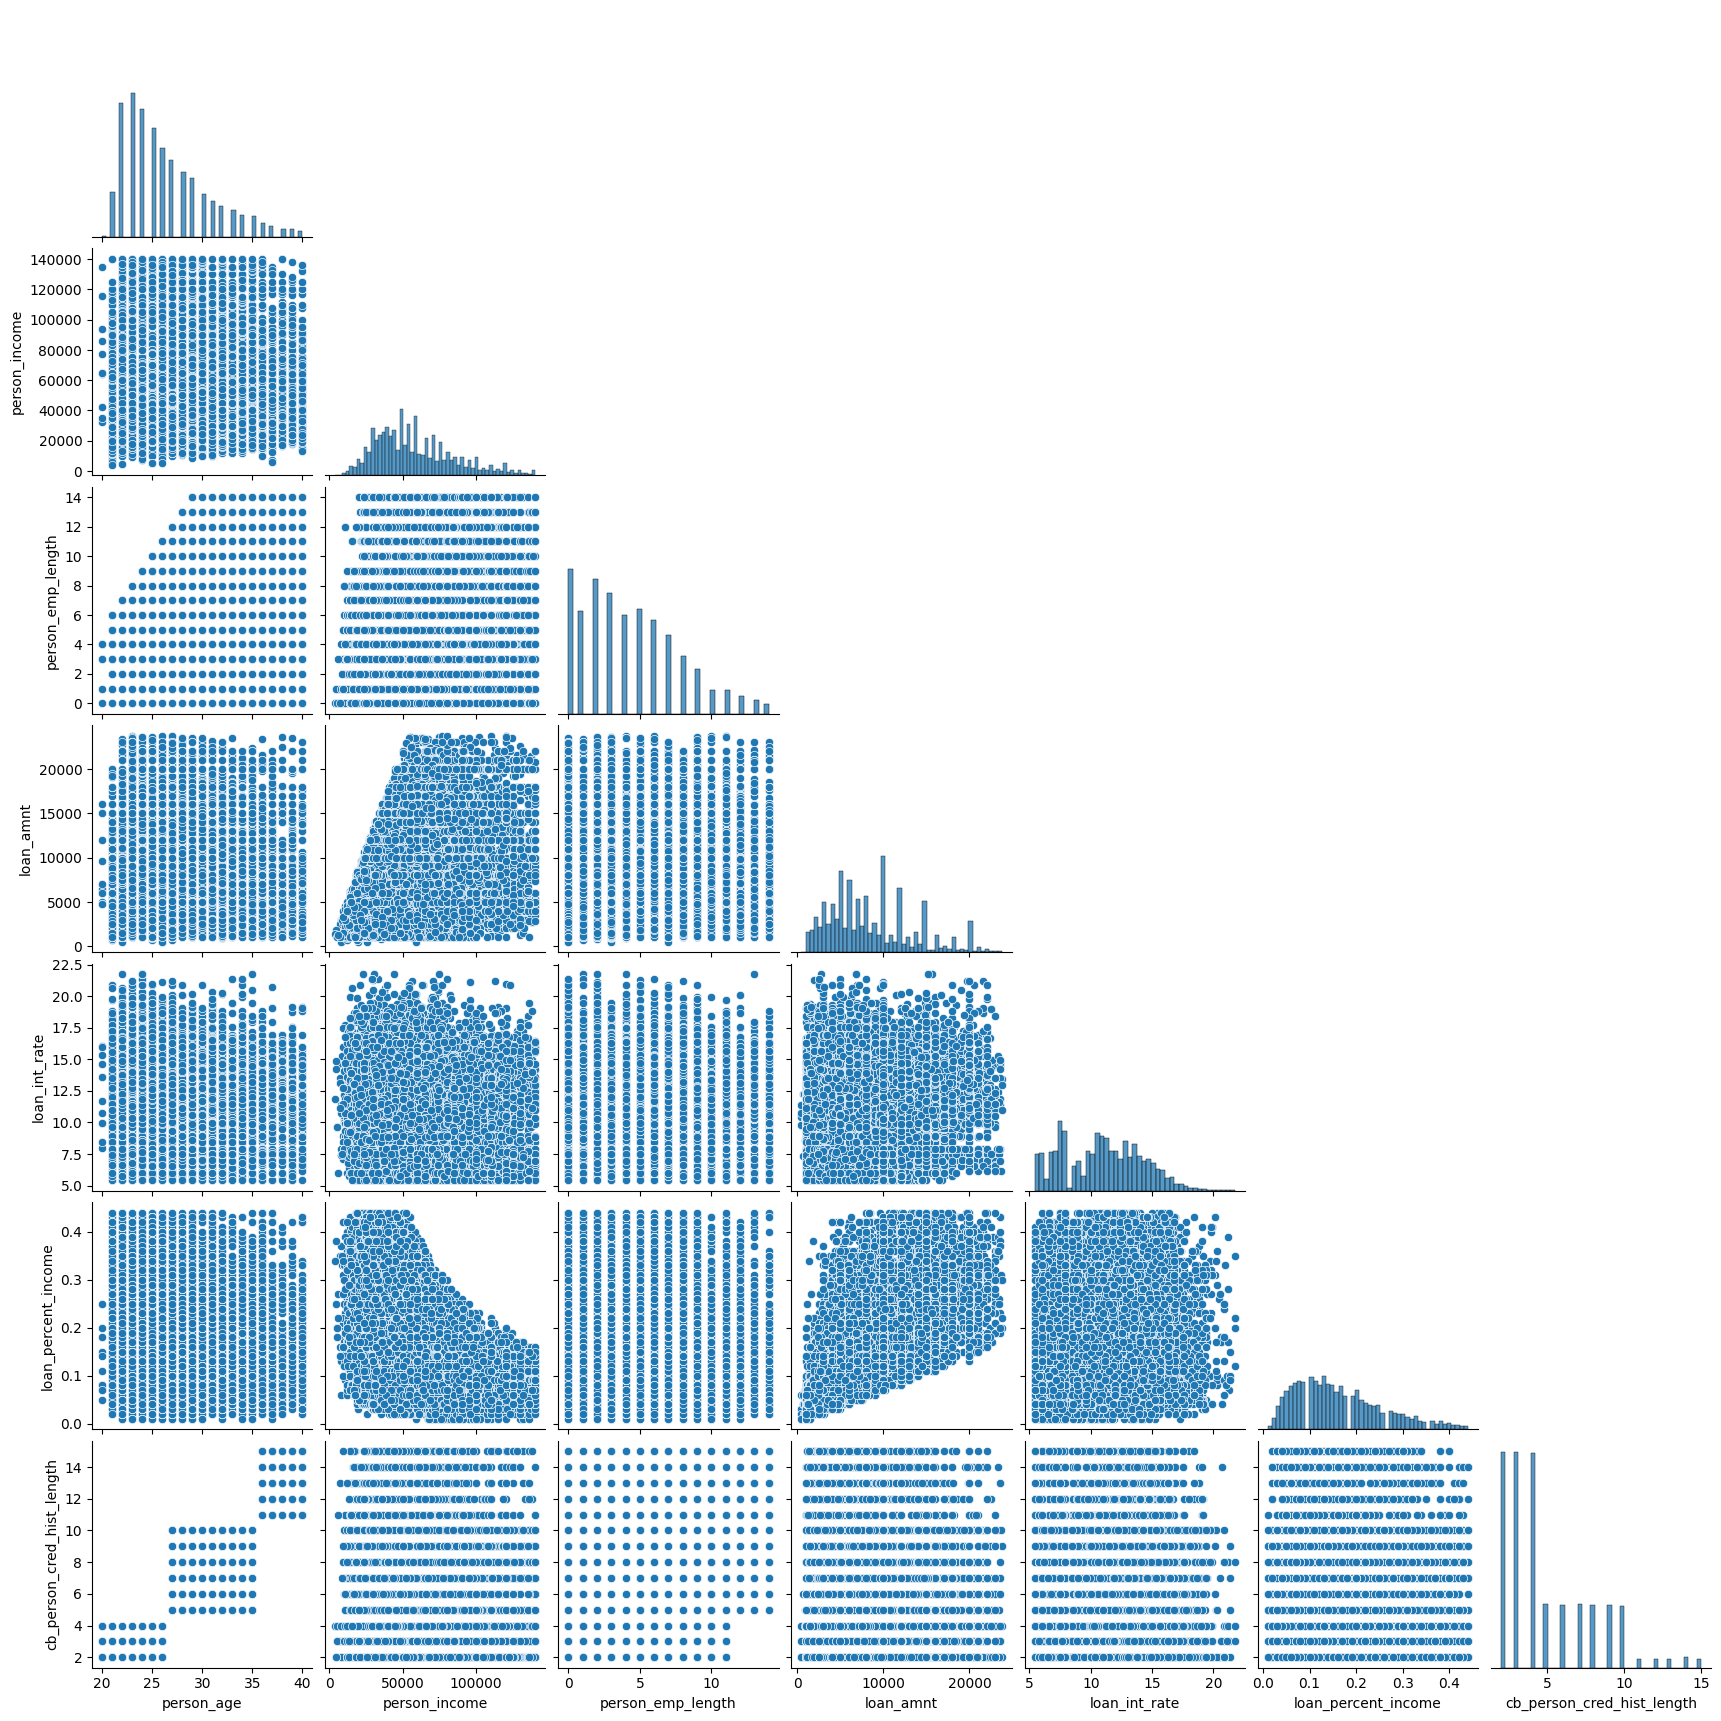

In [34]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

df_out = df_num[~(
    (df_num < (Q1 - 1.5 * IQR)) |
    (df_num > (Q3 + 1.5 * IQR))
).any(axis=1)]

sns.pairplot(df_out, corner=True)
plt.show()

In [36]:
len(df_num)

28632

In [35]:
len(df_out)

23750